In [1]:
# Yash Singh 


# Yash Singh 
# date: 11/11/2024 
# this script creates processed data that will be used to make ue plot 

# Necessary Packages 

import numpy as np 
import pandas as pd 

# Specify directories 
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"

stocks = pd.read_csv(f"{data_dir}/fred_employment/employment_v2.csv")

# Basic Processing of stocks 
stocks.columns = ['date', 'E', 'U']
stocks = stocks.iloc[11:].reset_index(drop=True)
stocks = stocks.dropna(subset=['date', 'E', 'U'])
stocks['date'] = pd.to_datetime(stocks['date'])
stocks['U'] = stocks['U'].astype(float)

ue = pd.read_csv(f"{data_dir}/fred_flows/UE.csv")
ue.columns = ['date', 'ue_flows']
ue['date'] = pd.to_datetime(ue['date'])

data= stocks.merge(ue, on = ['date'])
data['job_finding_rate'] = data['ue_flows'] / data['U']

keep = ['date', 'job_finding_rate']
data = data[keep]

# Create 'date_quarterly' column
data["date_quarterly"] = data["date"].dt.to_period("Q").dt.start_time


# Collapse to quarterly level by averaging 'ee_pol'
df_quarterly = data.groupby("date_quarterly", as_index=False)["job_finding_rate"].mean()


keep = ['date_quarterly', 'job_finding_rate']
df_quarterly = df_quarterly[keep] 
df_quarterly['job_finding_rate'] = df_quarterly['job_finding_rate'] * 100 


df_quarterly.to_csv(f"{output_dir}/data/ue_flows.csv", index=False)

# Yash Singh 
# date: 11/11/2024 
# this script creates processed data with 3-month moving average

# Necessary Packages 
import pandas as pd 

# Specify directories 
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"

# Load and process data
stocks = pd.read_csv(f"{data_dir}/fred_employment/employment_v2.csv")
stocks.columns = ['date', 'E', 'U']
stocks = stocks.iloc[11:].reset_index(drop=True)
stocks = stocks.dropna(subset=['date', 'E', 'U'])
stocks['date'] = pd.to_datetime(stocks['date'])
stocks['U'] = stocks['U'].astype(float)

ue = pd.read_csv(f"{data_dir}/fred_flows/EU.csv")
ue.columns = ['date', 'eu_flows']
ue['date'] = pd.to_datetime(ue['date'])

# Merge and calculate job finding rate
data = stocks.merge(ue, on=['date'])
data['eu_rate'] = (data['eu_flows'] / data['E'])* 100


# Keep and save relevant columns
output_cols = ['date', 'eu_rate']
data[output_cols].to_csv(f"{output_dir}/data/eu_rate.csv", index=False)

C:\Users\singhy\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\singhy\AppData\Local\Temp\ipykernel_9228\3554567670.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
u_rate = pd.read_csv(f"{data_dir}/unemployment_rate/u_rate.csv")

In [3]:
u_rate.columns = ['date', 'u_rate']
u_rate = u_rate.iloc[11:].reset_index(drop=True)
u_rate = u_rate.dropna(subset=['date', 'u_rate'])
u_rate['date'] = pd.to_datetime(u_rate['date'])
u_rate['u_rate'] = u_rate['u_rate'].astype(float)


In [4]:
emp2pop = pd.read_csv(f"{data_dir}/employment_rate/emp_2_pop_ratio.csv")

In [5]:
emp2pop.columns = ['date', 'emp2pop']
emp2pop = emp2pop.iloc[11:].reset_index(drop=True)
emp2pop = emp2pop.dropna(subset=['date', 'emp2pop'])
emp2pop['date'] = pd.to_datetime(emp2pop['date'])
emp2pop['emp2pop'] = emp2pop['emp2pop'].astype(float)


In [6]:
# Merge 

final = data.merge(u_rate, on=['date'])
final = final.merge(emp2pop, on= ['date'])

In [7]:
final = final[(final['date'] >= '2016-01-01')]

In [8]:
keep = ['date', 'eu_rate', 'u_rate', 'emp2pop']
final = final[keep].reset_index(drop=True)

final['inf_period'] = ((final['date'] >= '2021-04-01') & (final['date'] <= '2023-05-01')).astype(int)
final['pre_period'] = ((final['date'] <= '2019-12-01')).astype(int)

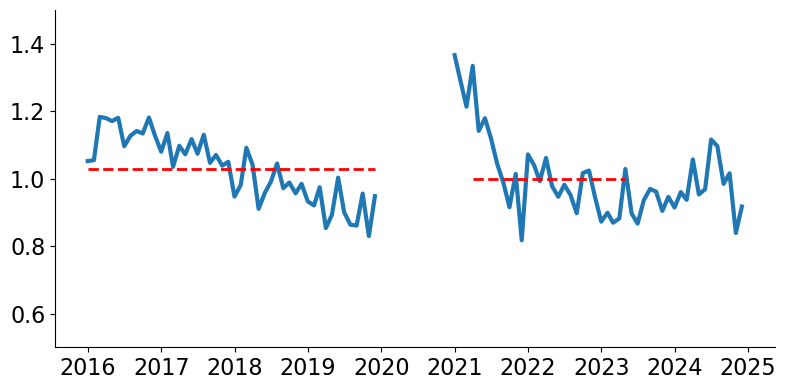

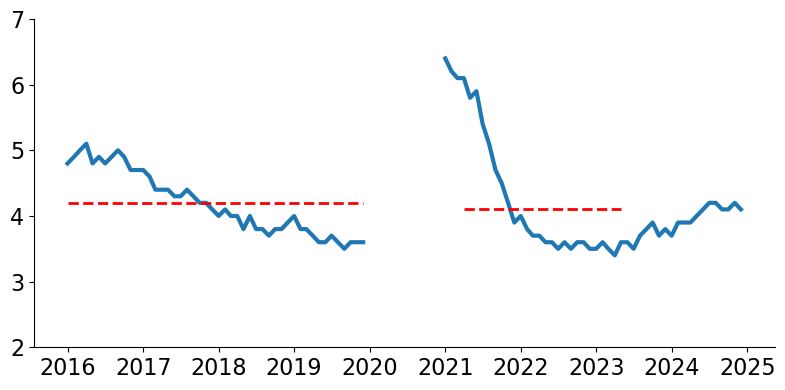

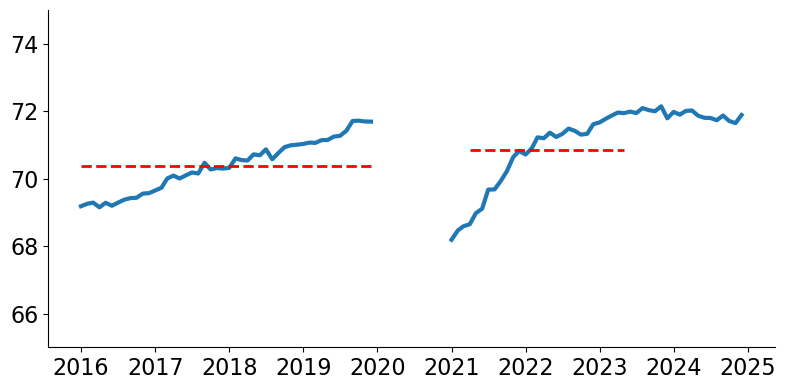

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Copy and mask out 2020 with NaNs (break in line)
plot_data = final.copy()
plot_data.loc[plot_data['date'].between('2020-01-01', '2020-12-31'), ['eu_rate', 'u_rate', 'emp2pop']] = np.nan

# Define date ranges
pre_dates = plot_data.loc[plot_data['pre_period'] == 1, 'date']
inf_dates = plot_data.loc[plot_data['inf_period'] == 1, 'date']

# Compute averages
avg_eu_pre = plot_data.loc[plot_data['pre_period'] == 1, 'eu_rate'].mean()
avg_eu_inf = plot_data.loc[plot_data['inf_period'] == 1, 'eu_rate'].mean()

avg_u_pre = plot_data.loc[plot_data['pre_period'] == 1, 'u_rate'].mean()
avg_u_inf = plot_data.loc[plot_data['inf_period'] == 1, 'u_rate'].mean()

avg_emp_pre = plot_data.loc[plot_data['pre_period'] == 1, 'emp2pop'].mean()
avg_emp_inf = plot_data.loc[plot_data['inf_period'] == 1, 'emp2pop'].mean()

# EU Rate
plt.figure(figsize=(8, 4))
plt.plot(plot_data['date'], plot_data['eu_rate'], linewidth=3)
plt.hlines(avg_eu_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_eu_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(.5, 1.5)
plt.tight_layout()
plt.savefig(f"{output_dir}/figures/eu_rate.pdf")

# Unemployment Rate
plt.figure(figsize=(8, 4))
plt.plot(plot_data['date'], plot_data['u_rate'], linewidth=3)
plt.hlines(avg_u_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_u_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(2, 7)
plt.tight_layout()
plt.savefig(f"{output_dir}/figures/u_rate.pdf")

# Employment-to-Population Ratio
plt.figure(figsize=(8, 4))
plt.plot(plot_data['date'], plot_data['emp2pop'], linewidth=3)
plt.hlines(avg_emp_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_emp_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(65, 75)
plt.tight_layout()
plt.savefig(f"{output_dir}/figures/emp_2_pop_ratio.pdf")
